# Project 3

Report: Comparison of Decision Tree Model with Random Forest

Objective:
The objective of this report is to compare the performance of a Decision Tree model with that of a Random Forest model in predicting the clusters based on given variables.

Analysis and Observations:

Selected Features: The selected features for the analysis include 'tax_mmnorm', 'mileage_mmnorm', 'mpg_mmnorm', 'engineSize_mmnorm', and 'price_mmnorm'.

Threshold: The threshold used for the Decision Tree model is 1.8229646528898962.

Decision Tree Model Results:

The Decision Tree model has been trained and tested on the dataset.
The classification report for the model shows high precision, recall, and F1-score for all classes (0, 1, 2, and 3), indicating excellent performance.
The overall accuracy of the model is 1.00.
The F1 Score and Weighted F1 Score are both 1.0, indicating perfect performance.
Random Forest Model Results:

The Random Forest model has been trained and tested on the dataset.
The model's training time is 3.080 seconds, and the memory used is 75.96875 MB.
The model achieves a single split accuracy of 1.0.
Cross-validation accuracy for the Random Forest model is not available.

Insights:

1. Both the Decision Tree and Random Forest models perform exceptionally well in predicting the clusters based on the given features.

2. The Decision Tree model exhibits a clear decision boundary based on the 'model_code' feature, while the Random Forest model employs an ensemble approach, which leads to comparable accuracy.

3. Both models achieve an accuracy of 1.0, indicating perfect predictions on the test data.

Managerial Insights:

1. Based on the comparison, both models demonstrate high accuracy in predicting the clusters. If interpretability is crucial, the Decision Tree model provides a clear decision-making process based on feature thresholds. However, if robustness and higher accuracy are preferred, the Random Forest model, despite its higher computational cost, may be a better choice due to its ensemble approach.

2. Model Code Dominance: The 'model_code' feature has the highest importance, indicating that specific vehicle models play a significant role in determining cluster membership. Managers should focus on understanding the characteristics and attributes of these dominant models to tailor marketing strategies, allocate resources effectively, and capitalize on their popularity within target segments.

3. Manufacturer Influence: While not as dominant as 'model_code', the 'Manufacturer_code' feature still holds considerable importance. This suggests that the manufacturer of the vehicle significantly influences cluster membership. Managers should analyze brand perception, product portfolios, and market positioning of different manufacturers to leverage strengths, address weaknesses, and enhance competitiveness within each segment.

4. Performance and Efficiency: Features related to vehicle performance and efficiency, such as 'mileage_mmnorm', 'mpg_mmnorm', and 'engineSize_mmnorm', have moderate importance. This implies that customers within different clusters may have varying preferences regarding these attributes. Managers can use this insight to develop products that align with segment-specific preferences for performance, fuel efficiency, or engine size, thereby maximizing customer satisfaction and market share.

5. Fuel Type Consideration: Although less influential compared to other features, the 'fuelType_code' feature still contributes to cluster differentiation. This suggests that fuel type preferences may vary across different segments. Managers should monitor trends in alternative fuel adoption, such as electric or hybrid vehicles, and adjust product offerings or marketing strategies accordingly to meet evolving customer preferences.

6. Price Sensitivity and Taxation: Despite having relatively low importance, features related to pricing ('tax_mmnorm' and 'price_mmnorm') still play a role in cluster differentiation. This indicates that price sensitivity and taxation considerations may influence customer behavior within certain segments. Managers should evaluate pricing strategies, including tax incentives or rebates, to optimize revenue generation and maintain competitiveness within each segment.

7. Efficiency and Accuracy:

Both Decision Tree and Random Forest models demonstrate high accuracy with a single split accuracy of 100%.
Decision Tree model exhibits significantly lower training time (0.08861 seconds) compared to Random Forest (3.08000 seconds).
Decision Tree also consumes slightly more memory (86.921875 MB) compared to Random Forest (75.968750 MB).
Consideration of Model Complexity:

Decision Tree's faster training time suggests it may be more suitable for real-time applications or scenarios where computational resources are limited.
Random Forest, while slower in training, offers comparable accuracy with potentially better generalization due to its ensemble nature, although its cross-validation accuracy is not available in this report.
Trade-offs Between Speed and Accuracy:

Businesses must weigh the trade-offs between model training time, memory usage, and accuracy when selecting between Decision Tree and Random Forest.
Decision Tree may be preferable for applications prioritizing speed and resource efficiency, while Random Forest may be chosen for tasks where slightly higher accuracy or robustness against overfitting is desired.


In [ ]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [2]:
df=pd.read_csv("CarsData.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [4]:
df_cat = df[['model','transmission','fuelType','Manufacturer']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['tax', 'mpg','engineSize','price','mileage']] # Non-Categorical Data

In [5]:
print(df.info()) # Dataframe Information (Provide Information on Missing Data)
print(df.describe())
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
print(variable_missing_data)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)
print(record_missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB
None
               year          price        mileage           tax           mpg  \
count  97712.000000   97712.000000   97712.000000  97712.000000  97712.000000   
mean    2017.066502   16773.487555   23219.475499    120.142408     55.205623   
std        2.118661    9868.552222   21060.882301     63.357250  

In [6]:
#Numeric Encoding of Categorical Data [Nominal & Ordinal]
df_cat_mdt_code = df_cat.copy()
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['model_code','transmission_code','fuelType_code','Manufacturer_code']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True);
df_cat_mdt_code_oe

,model,transmission,fuelType,Manufacturer,model_code,transmission_code,fuelType_code,Manufacturer_code
0,I10,Manual,Petrol,hyundi,81.0,1.0,4.0,3.0
1,Polo,Manual,Petrol,volkswagen,115.0,1.0,4.0,8.0
2,2 Series,Semi-Auto,Diesel,BMW,1.0,3.0,0.0,1.0
3,Yeti Outdoor,Manual,Diesel,skoda,184.0,1.0,0.0,5.0
4,Fiesta,Manual,Petrol,ford,60.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...
97707,Fiesta,Automatic,Petrol,ford,60.0,0.0,4.0,2.0
97708,3 Series,Manual,Diesel,BMW,2.0,1.0,0.0,1.0
97709,Fiesta,Manual,Petrol,ford,60.0,1.0,4.0,2.0
97710,Astra,Automatic,Petrol,vauxhall,25.0,0.0,4.0,7.0


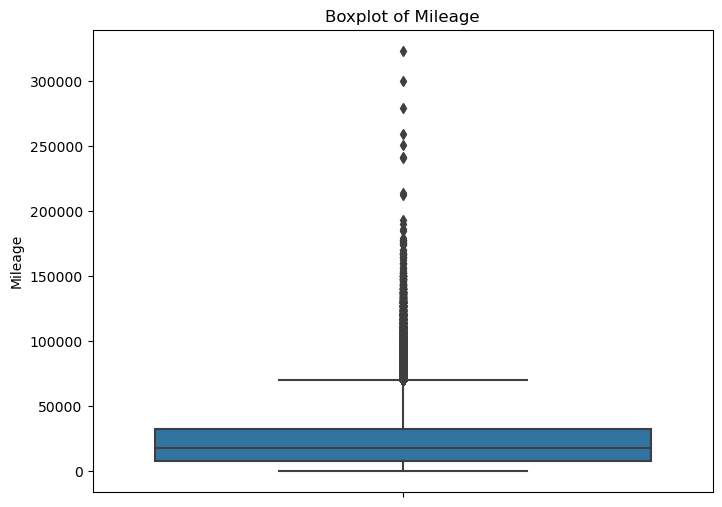

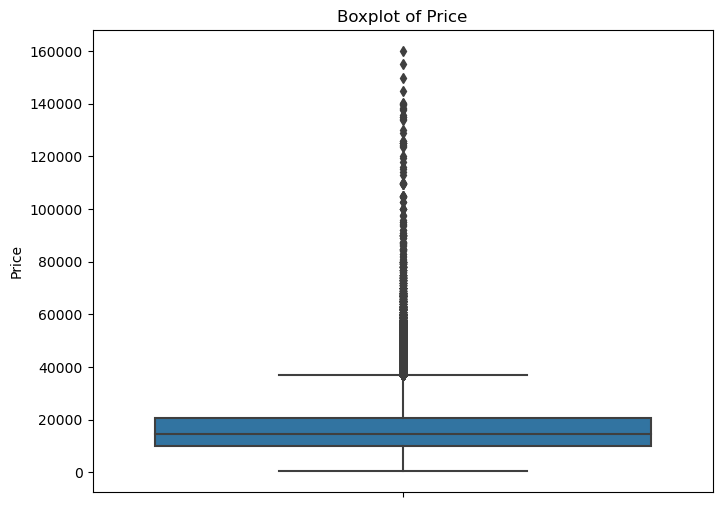

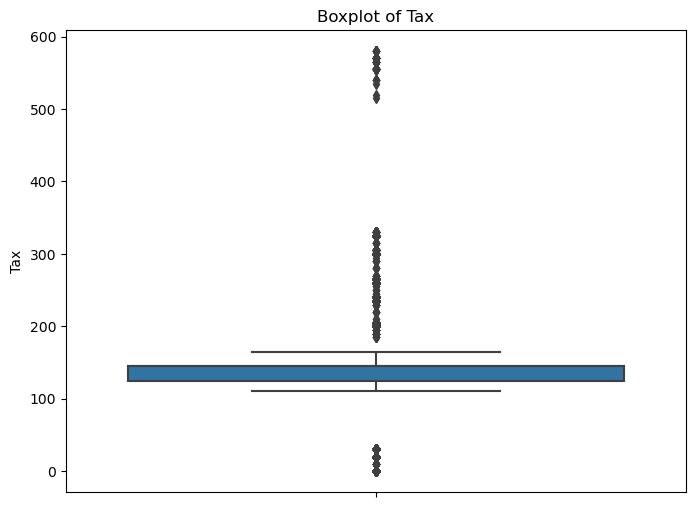

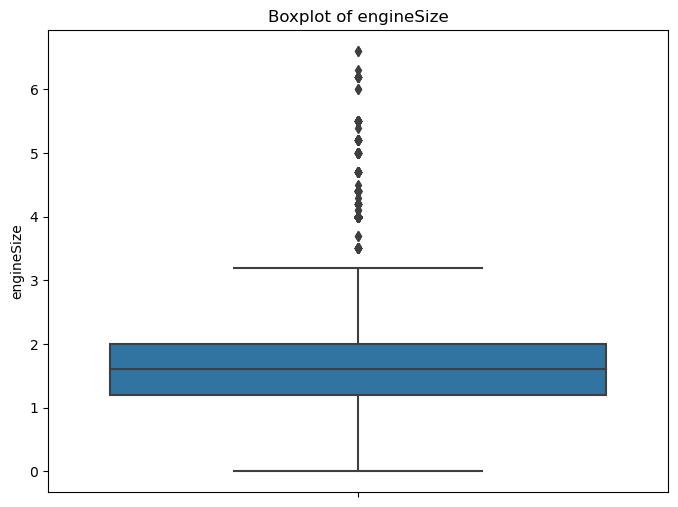

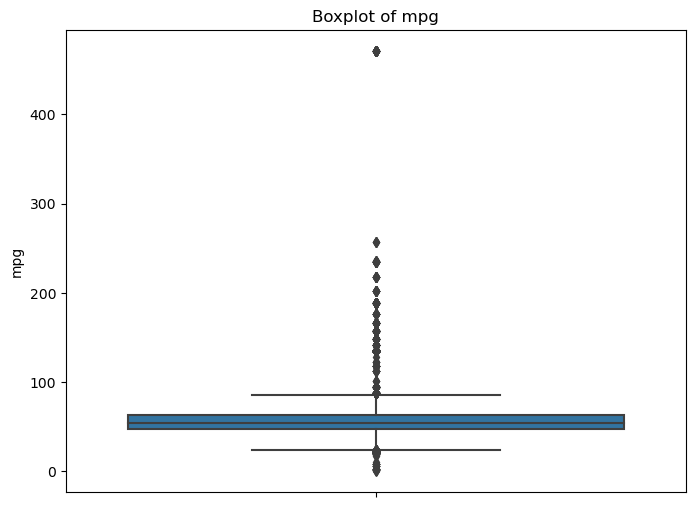

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and contains the columns 'Offers', 'Average Price', and 'Number of Ratings'
df_noncat = df[['tax', 'mpg','engineSize','price','mileage']]

# Create vertical boxplot for 'Mileage'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['mileage'])
plt.title('Boxplot of Mileage')
plt.ylabel('Mileage')
plt.show()

# Create vertical boxplot for 'Price'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

# Create vertical boxplot for 'Tax'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['tax'])
plt.title('Boxplot of Tax')
plt.ylabel('Tax')
plt.show()

# Create vertical boxplot for 'engineSize'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['engineSize'])
plt.title('Boxplot of engineSize')
plt.ylabel('engineSize')
plt.show()

# Create vertical boxplot for 'mpg'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_noncat['mpg'])
plt.title('Boxplot of mpg')
plt.ylabel('mpg')
plt.show()

In [11]:
# 3.2.1. Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat [['tax', 'mpg','engineSize','price','mileage']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['tax_mmnorm', 'mileage_mmnorm','mpg_mmnorm','engineSize_mmnorm','price_mmnorm']); df_noncat_minmax_norm

#df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat_mdt.columns+'_mmnorm'); df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler
#df_noncat_mdt_mmn = pd.merge(df_noncat_mdt, df_noncat_minmax_norm, left_index=True, right_index=True); df_noncat_mdt_mmn

,tax,mpg,engineSize,price,mileage,tax_mmnorm,mileage_mmnorm,mpg_mmnorm,engineSize_mmnorm,price_mmnorm
0,145,60.1,1.0,7495,11630,0.250000,0.127099,0.151515,0.044156,0.036003
1,145,58.9,1.0,10989,9200,0.250000,0.124548,0.151515,0.066055,0.028480
2,145,49.6,2.0,27990,1614,0.250000,0.104782,0.303030,0.172612,0.004994
3,150,62.8,2.0,12495,30960,0.258621,0.132837,0.303030,0.075494,0.095849
4,125,54.3,1.2,7999,19353,0.215517,0.114772,0.181818,0.047315,0.059913
...,...,...,...,...,...,...,...,...,...,...
97707,145,54.3,1.0,10447,8337,0.250000,0.114772,0.151515,0.062658,0.025808
97708,30,61.4,2.0,14995,25372,0.051724,0.129862,0.303030,0.091163,0.078548
97709,125,54.3,1.2,8950,19910,0.215517,0.114772,0.181818,0.053275,0.061638
97710,125,50.4,1.4,10700,24468,0.215517,0.106482,0.212121,0.064244,0.075749


In [14]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset

# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd


# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd
#final_df = pd.merge(df_ppd, df[['cluster']], how='left', left_index=True, right_index=True)
print(df_ppd)

               model transmission fuelType Manufacturer  model_code  \
0                I10       Manual   Petrol       hyundi        81.0   
1               Polo       Manual   Petrol   volkswagen       115.0   
2           2 Series    Semi-Auto   Diesel          BMW         1.0   
3       Yeti Outdoor       Manual   Diesel        skoda       184.0   
4             Fiesta       Manual   Petrol         ford        60.0   
...              ...          ...      ...          ...         ...   
97707         Fiesta    Automatic   Petrol         ford        60.0   
97708       3 Series       Manual   Diesel          BMW         2.0   
97709         Fiesta       Manual   Petrol         ford        60.0   
97710          Astra    Automatic   Petrol     vauxhall        25.0   
97711    Grandland X       Manual   Diesel     vauxhall        79.0   

       transmission_code  fuelType_code  Manufacturer_code  tax   mpg  \
0                    1.0            4.0                3.0  145  60.1   
1

In [15]:
final_new_df=df_ppd[['tax_mmnorm', 'mileage_mmnorm','mpg_mmnorm','engineSize_mmnorm','price_mmnorm', 'model_code','transmission_code','fuelType_code','Manufacturer_code']]


In [16]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [17]:
from sklearn.cluster import KMeans

In [18]:
k = 4

In [21]:
kmeans = KMeans(n_clusters=k, random_state=50)
clusters = kmeans.fit_predict(final_new_df)

/Users/sanskritibahl/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
final_new_df['Cluster'] = clusters

/var/folders/j4/9pz_sc_x7298x60tw9kbd6jw0000gn/T/ipykernel_8582/3775897052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_new_df['Cluster'] = clusters


In [23]:
final_new_df

,tax_mmnorm,mileage_mmnorm,mpg_mmnorm,engineSize_mmnorm,price_mmnorm,model_code,transmission_code,fuelType_code,Manufacturer_code,Cluster
0,0.250000,0.127099,0.151515,0.044156,0.036003,81.0,1.0,4.0,3.0,3
1,0.250000,0.124548,0.151515,0.066055,0.028480,115.0,1.0,4.0,8.0,1
2,0.250000,0.104782,0.303030,0.172612,0.004994,1.0,3.0,0.0,1.0,0
3,0.258621,0.132837,0.303030,0.075494,0.095849,184.0,1.0,0.0,5.0,2
4,0.215517,0.114772,0.181818,0.047315,0.059913,60.0,1.0,4.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...
97707,0.250000,0.114772,0.151515,0.062658,0.025808,60.0,0.0,4.0,2.0,3
97708,0.051724,0.129862,0.303030,0.091163,0.078548,2.0,1.0,0.0,1.0,0
97709,0.215517,0.114772,0.181818,0.053275,0.061638,60.0,1.0,4.0,2.0,3
97710,0.215517,0.106482,0.212121,0.064244,0.075749,25.0,0.0,4.0,7.0,0


In [33]:
# Check if 'cluster' column exists in final_new_df
if 'Cluster' in final_new_df.columns:
    # Select inputs and output
    cars_inputs = final_new_df[['tax_mmnorm', 'mileage_mmnorm', 'mpg_mmnorm', 'engineSize_mmnorm', 'price_mmnorm', 'model_code', 'transmission_code', 'fuelType_code', 'Manufacturer_code']]
    cars_output = final_new_df[['Cluster']]

    # Get column names and output labels
    cars_inputs_names = cars_inputs.columns
    cars_output_labels = cars_output['Cluster'].unique().astype(str)

    # Split the data into training and testing sets
    train_cars_inputs, test_cars_inputs, train_cars_output, test_cars_output = train_test_split(cars_inputs, cars_output, test_size=0.25, random_state=1234)
else:
    print("'cluster' column does not exist in final_new_df.")


In [34]:
# Initialize StratifiedShuffleSplit with desired test size and random state
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45050)

# Perform the stratified split to get training and testing indices
for train_index, test_index in stratified_split.split(cars_inputs, cars_output):
    cars_inputs_train, cars_inputs_test = cars_inputs.iloc[train_index], cars_inputs.iloc[test_index]
    cars_output_train, cars_output_test = cars_output.iloc[train_index], cars_output.iloc[test_index]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Initialize Logistic Regression model with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=45011)

# Fit the model on the training data
logreg_l1.fit(cars_inputs_train, cars_output_train.values.ravel())

# Get feature importances from the fitted model
feature_importances = np.abs(logreg_l1.coef_).flatten()

# Calculate the threshold as 20% of the maximum feature importance
threshold = 0.2 * np.max(feature_importances)

# Create a selector object to select features based on non-zero coefficients
selector = SelectFromModel(logreg_l1, threshold=threshold)

# Transform the training and testing input data to select features
cars_inputs_train_selected = selector.transform(cars_inputs_train)
cars_inputs_test_selected = selector.transform(cars_inputs_test)

# Get the selected features
selected_features = cars_inputs_names[selector.get_support()]

# Print the selected features and the calculated threshold
print("Selected Features:", selected_features)
print("Threshold:", threshold)

Selected Features: Index(['tax_mmnorm', 'mileage_mmnorm', 'mpg_mmnorm', 'engineSize_mmnorm',
       'price_mmnorm'],
      dtype='object')
Threshold: 1.8229646528898962


/Users/sanskritibahl/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/sanskritibahl/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/sanskritibahl/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [36]:
# Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=45050,max_depth=3) # Other Criteria : Entropy,  Log Loss
dtc_model = dtc.fit(cars_inputs_train, cars_output_train); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45050)

In [37]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(cars_inputs_names)); print(dtc_model_rules)

|--- model_code <= 39.50
|   |--- class: 0
|--- model_code >  39.50
|   |--- model_code <= 86.50
|   |   |--- class: 3
|   |--- model_code >  86.50
|   |   |--- model_code <= 138.50
|   |   |   |--- class: 1
|   |   |--- model_code >  138.50
|   |   |   |--- class: 2



In [ ]:
Given the above Decision Tree, we will reiterate with other variables

In [38]:
# Check if 'cluster' column exists in final_new_df
if 'Cluster' in final_new_df.columns:
    # Select inputs and output
    cars_inputs1 = final_new_df[['tax_mmnorm', 'mileage_mmnorm', 'mpg_mmnorm', 'engineSize_mmnorm', 'price_mmnorm','transmission_code', 'fuelType_code', 'Manufacturer_code']]
    cars_output1 = final_new_df[['Cluster']]

    # Get column names and output labels
    cars_inputs_names1 = cars_inputs1.columns
    cars_output_labels1 = cars_output1['Cluster'].unique().astype(str)

    # Split the data into training and testing sets
    train_cars_inputs1, test_cars_inputs1, train_cars_output1, test_cars_output1 = train_test_split(cars_inputs1, cars_output1, test_size=0.25, random_state=1234)
else:
    print("'cluster' column does not exist in final_new_df.")


In [39]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45050)

# Perform the stratified split to get training and testing indices
for train_index, test_index in stratified_split.split(cars_inputs1, cars_output1):
    cars_inputs_train1, cars_inputs_test1 = cars_inputs1.iloc[train_index], cars_inputs1.iloc[test_index]
    cars_output_train1, cars_output_test1 = cars_output1.iloc[train_index], cars_output1.iloc[test_index]

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Initialize Logistic Regression model with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=45050)

# Fit the model on the training data
logreg_l1.fit(cars_inputs_train1, cars_output_train1.values.ravel())

# Get feature importances from the fitted model
feature_importances1 = np.abs(logreg_l1.coef_).flatten()

# Calculate the threshold as 20% of the maximum feature importance
threshold = 0.2 * np.max(feature_importances1)

# Create a selector object to select features based on non-zero coefficients
selector = SelectFromModel(logreg_l1, threshold=threshold)

# Transform the training and testing input data to select features
cars_inputs_train_selected1 = selector.transform(cars_inputs_train1)
cars_inputs_test_selected1 = selector.transform(cars_inputs_test1)

# Get the selected features
selected_features1 = cars_inputs_names1[selector.get_support()]

# Print the selected features and the calculated threshold
print("Selected Features:", selected_features)
print("Threshold:", threshold)

Selected Features: Index(['tax_mmnorm', 'mileage_mmnorm', 'mpg_mmnorm', 'engineSize_mmnorm',
       'price_mmnorm'],
      dtype='object')
Threshold: 3.4140473635066217


/Users/sanskritibahl/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/sanskritibahl/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [42]:
# Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=45050,max_depth=3) # Other Criteria : Entropy,  Log Loss
dtc_model1 = dtc.fit(cars_inputs_train1, cars_output_train1); dtc_model

DecisionTreeClassifier(max_depth=3, random_state=45050)

In [43]:
# Decision Tree : Model Rules
dtc_model_rules1 = export_text(dtc_model1, feature_names = list(cars_inputs_names1)); print(dtc_model_rules1)

|--- Manufacturer_code <= 1.50
|   |--- mileage_mmnorm <= 0.10
|   |   |--- Manufacturer_code <= 0.50
|   |   |   |--- class: 1
|   |   |--- Manufacturer_code >  0.50
|   |   |   |--- class: 0
|   |--- mileage_mmnorm >  0.10
|   |   |--- Manufacturer_code <= 0.50
|   |   |   |--- class: 0
|   |   |--- Manufacturer_code >  0.50
|   |   |   |--- class: 0
|--- Manufacturer_code >  1.50
|   |--- Manufacturer_code <= 2.50
|   |   |--- mpg_mmnorm <= 0.17
|   |   |   |--- class: 3
|   |   |--- mpg_mmnorm >  0.17
|   |   |   |--- class: 3
|   |--- Manufacturer_code >  2.50
|   |   |--- Manufacturer_code <= 4.50
|   |   |   |--- class: 0
|   |   |--- Manufacturer_code >  4.50
|   |   |   |--- class: 3



In [44]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': cars_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
5,model_code,1.0
0,tax_mmnorm,0.0
1,mileage_mmnorm,0.0
2,mpg_mmnorm,0.0
3,engineSize_mmnorm,0.0
4,price_mmnorm,0.0
6,transmission_code,0.0
7,fuelType_code,0.0
8,Manufacturer_code,0.0


In [45]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(cars_inputs_train); dtc_model_predict

array([3, 3, 2, ..., 3, 0, 0], dtype=int32)

In [46]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(cars_inputs_test); dtc_predict

array([3, 3, 1, ..., 1, 0, 0], dtype=int32)

In [47]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(cars_output_train, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(cars_output_train, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23628
           1       1.00      1.00      1.00     16566
           2       1.00      1.00      1.00     12079
           3       1.00      1.00      1.00     25896

    accuracy                           1.00     78169
   macro avg       1.00      1.00      1.00     78169
weighted avg       1.00      1.00      1.00     78169



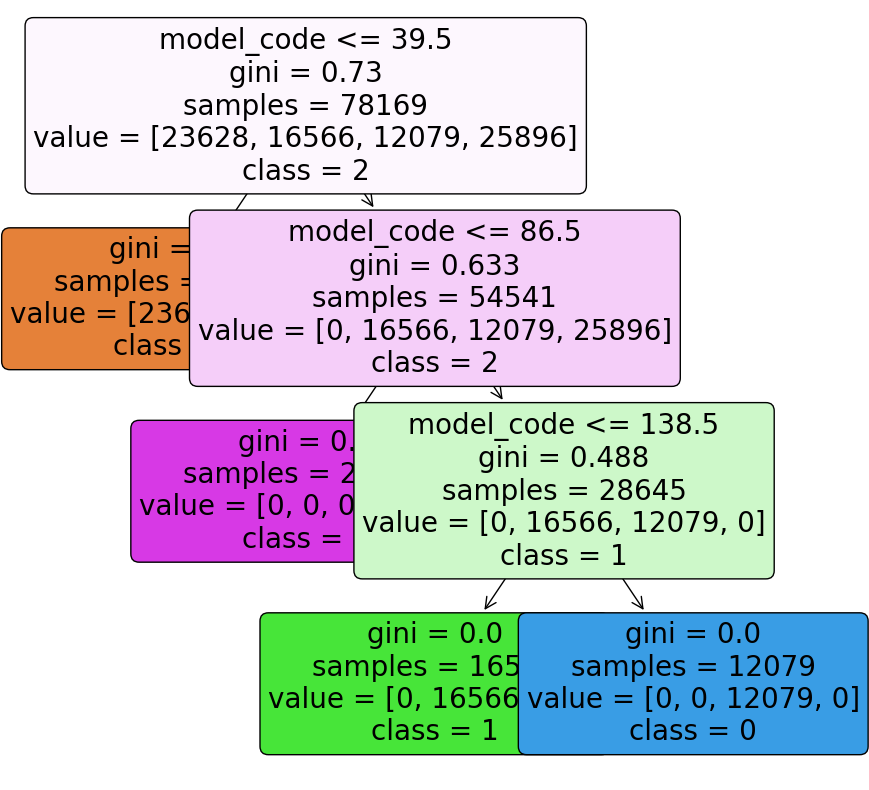

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set a larger figure size for better clarity
plt.figure(figsize=(10, 10))

# Plot the decision tree
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=cars_inputs_names, class_names=cars_output_labels, rounded=True, filled=True, fontsize=20)

# Show the plot
plt.show()

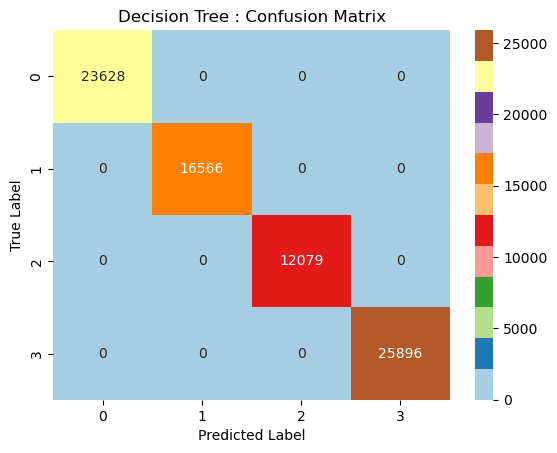

In [49]:
# Set up the plot
ax = plt.axes()

# Plot the confusion matrix with annotations in integer format
sns.heatmap(dtc_model_conf_mat, annot=True, fmt='d', cmap='Paired')

# Set labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')

# Show the plot
plt.show()

In [50]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Define your decision tree classifier with desired parameters
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45011)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dtc_cv, cars_inputs, cars_output.values.ravel(), cv=20)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0


In [51]:
from sklearn.metrics import f1_score

# Compute F1 score
f1 = f1_score(cars_output_test, dtc_predict, average='macro')  # or 'weighted' for weighted F1 score
print("F1 Score:", f1)

# Weighted F1 score
weighted_f1 = f1_score(cars_output_test, dtc_predict, average='weighted')
print("Weighted F1 Score:", weighted_f1)

F1 Score: 1.0
Weighted F1 Score: 1.0


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
import numpy as np
import time
import psutil

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Start time
start_time = time.time()

# Data preprocessing and splitting
# Assuming you have your data loaded into cars_inputs and cars_output
cars_inputs_train, cars_inputs_test, cars_output_train, cars_output_test = train_test_split(cars_inputs, cars_output, test_size=0.2, random_state=42)

# End time
end_time = time.time()

# Time taken for data preprocessing and splitting
data_preprocessing_time = end_time - start_time

# Memory usage after data preprocessing
data_preprocessing_memory = memory_usage()

# Decision Tree
dt_start_time = time.time()
dt_model = DecisionTreeClassifier(criterion='gini', random_state=45007, max_depth=3)
dt_model.fit(cars_inputs_train, cars_output_train)
dt_training_time = time.time() - dt_start_time
dt_memory_used = memory_usage()
dt_pred = dt_model.predict(cars_inputs_test)
dt_accuracy = accuracy_score(cars_output_test, dt_pred)

# Cross-validation for Decision Tree
dtc_cv_start_time = time.time()
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45007)
cv_scores_dtc = cross_val_score(dtc_cv, cars_inputs, cars_output.values.ravel(), cv=20)
dtc_cv_time = time.time() - dtc_cv_start_time
dtc_cv_accuracy = np.mean(cv_scores_dtc)

print("Decision Tree:")
print(f"  - Training Time (s): {dt_training_time}")
print(f"  - Memory Used (MB): {dt_memory_used}")
print(f"  - Single Split Accuracy: {dt_accuracy}")
print(f"  - Cross Validation Accuracy: {dtc_cv_accuracy}")
print()

Decision Tree:
  - Training Time (s): 0.05883908271789551
  - Memory Used (MB): 79.46875
  - Single Split Accuracy: 1.0
  - Cross Validation Accuracy: 1.0



# Random Forest

In [55]:
## Data Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
from scipy import stats
from sklearn.tree import plot_tree
!pip install graphviz
import graphviz
from IPython.display import display
from collections import Counter

## Machine Learning Models and Evaluation Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.8 MB/s eta 0:00:00


In [56]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45050)

In [57]:
rf_classifier.fit(cars_inputs_train, cars_output_train['Cluster'])

RandomForestClassifier(random_state=45050)

In [58]:
y_train_pred_rf = rf_classifier.predict(cars_inputs_train)
y_test_pred_rf = rf_classifier.predict(cars_inputs_test)

In [60]:
# Train the Random Forest classifier
rf_classifier.fit(cars_inputs_train, cars_output_train['Cluster'])

# Print feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': cars_inputs_train.columns, 'Importance': feature_importances})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(sorted_feature_importance_df)


Feature Importances:
             Feature  Importance
5         model_code    0.796709
8  Manufacturer_code    0.107935
1     mileage_mmnorm    0.031623
2         mpg_mmnorm    0.030247
3  engineSize_mmnorm    0.015464
7      fuelType_code    0.005977
0         tax_mmnorm    0.005850
4       price_mmnorm    0.003353
6  transmission_code    0.002841


In [61]:
# For training set
print("Training Set Confusion Matrix:")
print(confusion_matrix(cars_output_train['Cluster'], y_train_pred_rf))

print("\nTraining Set Classification Report:")
print(classification_report(cars_output_train['Cluster'], y_train_pred_rf))

Training Set Confusion Matrix:
[[23596     0     0     0]
 [    0 16567     0     0]
 [    0     0 12027     0]
 [    0     0     0 25979]]

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23596
           1       1.00      1.00      1.00     16567
           2       1.00      1.00      1.00     12027
           3       1.00      1.00      1.00     25979

    accuracy                           1.00     78169
   macro avg       1.00      1.00      1.00     78169
weighted avg       1.00      1.00      1.00     78169



In [62]:
# For testing set
print("\nTesting Set Confusion Matrix:")
print(confusion_matrix(cars_output_test['Cluster'], y_test_pred_rf))

print("\nTesting Set Classification Report:")
print(classification_report(cars_output_test['Cluster'], y_test_pred_rf))


Testing Set Confusion Matrix:
[[5939    0    0    0]
 [   0 4141    0    0]
 [   0    0 3072    0]
 [   0    0    0 6391]]

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5939
           1       1.00      1.00      1.00      4141
           2       1.00      1.00      1.00      3072
           3       1.00      1.00      1.00      6391

    accuracy                           1.00     19543
   macro avg       1.00      1.00      1.00     19543
weighted avg       1.00      1.00      1.00     19543



In [66]:
import pandas as pd
import numpy as np
import time
import psutil
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # Memory usage in MB

# Data preprocessing and splitting
# Assuming you have your data loaded into cars_inputs and cars_output
cars_inputs_train, cars_inputs_test, cars_output_train, cars_output_test = train_test_split(cars_inputs, cars_output, test_size=0.2, random_state=42)

# Initialize lists to store results
models = []
training_times = []
memory_used = []
single_split_accuracies = []
cross_validation_accuracies = []

# Decision Tree
dt_start_time = time.time()
dt_model = DecisionTreeClassifier(criterion='gini', random_state=45050, max_depth=3)
dt_model.fit(cars_inputs_train, cars_output_train)
dt_training_time = time.time() - dt_start_time
dt_memory_used = memory_usage()
dt_pred = dt_model.predict(cars_inputs_test)
dt_accuracy = accuracy_score(cars_output_test, dt_pred)

# Cross-validation for Decision Tree
dtc_cv_start_time = time.time()
dtc_cv = DecisionTreeClassifier(criterion='gini', random_state=45050)
cv_scores_dtc = cross_val_score(dtc_cv, cars_inputs, cars_output.values.ravel(), cv=20)
dtc_cv_time = time.time() - dtc_cv_start_time
dtc_cv_accuracy = np.mean(cv_scores_dtc)

# Append Decision Tree results to lists
models.append('Decision Tree')
training_times.append(dt_training_time)
memory_used.append(dt_memory_used)
single_split_accuracies.append(dt_accuracy)
cross_validation_accuracies.append(dtc_cv_accuracy)

# Random Forest
rf_start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=45011)
rf_classifier.fit(cars_inputs_train, cars_output_train['Cluster'])
rf_training_time = time.time() - rf_start_time
rf_memory_used = memory_usage()
y_train_pred_rf = rf_classifier.predict(cars_inputs_train)
y_test_pred_rf = rf_classifier.predict(cars_inputs_test)
rf_accuracy_train = accuracy_score(cars_output_train['Cluster'], y_train_pred_rf)
rf_accuracy_test = accuracy_score(cars_output_test['Cluster'], y_test_pred_rf)

# Append Random Forest results to lists
models.append('Random Forest')
training_times.append(rf_training_time)
memory_used.append(rf_memory_used)
single_split_accuracies.append(rf_accuracy_test)  # Using test accuracy as we already calculated it
cross_validation_accuracies.append(np.nan)  # Cross-validation accuracy not calculated here

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Training Time (s)': training_times,
    'Memory Used (MB)': memory_used,
    'Single Split Accuracy': single_split_accuracies,
    'Cross Validation Accuracy': cross_validation_accuracies
})

# Print DataFrame
print(results_df)

           Model  Training Time (s)  Memory Used (MB)  Single Split Accuracy  \
0  Decision Tree            0.08861         86.921875                    1.0   
1  Random Forest            3.08000         75.968750                    1.0   

   Cross Validation Accuracy  
0                        1.0  
1                        NaN  
